# Проверка гипотез об увеличении выручки для интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

---

**Цель проекта** - изучение данных о продажах интернет-магазина. На основе информации о влиянии различных гипотез на пользователей требуется их приоритизировать. По данным, полученным в ходе А/В-теста, необходимо принять решение о его завершении и определить, есть ли отличия между исследуемыми группами по конверсии и среднему чеку.

Массивы данных содержат в себе информацию о гипотезах для проверки (охват пользователей и влияние на них, затраты на проверку, степень уверенности в гипотезе), заказах за рассматриваемый период (дата совершения покупки, выручка, группа теста), а также о количестве посетителей.   

В ходе исследования решается ряд **задач**:
- подготовка данных; 
- проведение анализа информации:
    + приоритизация гипотез с помощью различных фреймворков;
    + анализ отличий в основных метриках после проведения теста (конверсия, средний чек) на "сырых" и очищенных данных;
    + проверка статистической значимости полученных результатов;
- принятие решения.  

## Содержание

[Часть 1. Приоритизация гипотез](#priority)
- [Обзор данных](#review_pt1)
- [Приоритизация с помощью фреймворка ICE](#ice)
- [Приоритизация с помощью фреймворка RICE](#rice)
- [Вывод](#conclusion_pt1)

[Часть 2. Анализ A/B-теста](#analysis_AB)
- [Обзор данных](#review_pt2)
- [Анализ "сырых" данных](#raw_data_analysis)
- [Анализ выбросов и всплесков](#wavelets_analysis)
- [Статистическая значимость различий между группами](#stat_sign)     
- [Вывод](#conclusion_pt2)  

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Часть 1. Приоритизация гипотез <a name="priority"></a>

### Обзор данных <a name="review_pt1"></a>

Считывание файла с данными в датафрейм и его вывод:

In [2]:
hypothesis_df = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 120)
hypothesis_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице представлена информация о гипотезах для увеличения выручки. В ней 5 столбцов:

- **Hypothesis** - формулировка гипотезы;
- **Reach** - охват пользователей по 10-балльной шкале;
- **Impact** - влияние на пользователей по 10-балльной шкале;
- **Confidence** - уверенность в гипотезе по 10-балльной шкале;
- **Efforts** - затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Общее количество записей о гипотезах - 9. Пропусков нет, типы данных корректны.


Переименуем столбцы в соответствии с общепринятой практикой:

In [4]:
hypothesis_df.columns = hypothesis_df.columns.str.lower()
hypothesis_df.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация с помощью фреймворка ICE <a name="ice"></a>

Посчитаем ICE для каждой из гипотез:

In [5]:
hypothesis_df['ICE'] = hypothesis_df['impact'] * hypothesis_df['confidence'] / hypothesis_df['efforts']
hypothesis_df.sort_values(by = 'ICE', ascending = False)[['hypothesis', 'ICE']].round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными представляются гипотезы с индексами 8, 0 и 7. Середнячки - 6 и 2. Безнадежные - 1, 5, 3 и 4.

### Приоритизация с помощью фреймворка RICE <a name="rice"></a>

Теперь определим RICE:

In [6]:
hypothesis_df['RICE'] = \
        hypothesis_df['reach'] * hypothesis_df['impact'] * hypothesis_df['confidence'] / hypothesis_df['efforts']
hypothesis_df.sort_values(by = 'RICE', ascending = False)[['hypothesis', 'RICE']].round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно этой методике, в приоритет следует взять гипотезу с индексом 7. Существенно уступают ей гипотезы 2, 0 и 6. Бесперспективны гипотезы 3, 1, 5 и 4.

### Вывод <a name="conclusion_pt1"></a>

Единственное отличие во фреймворках ICE и RICE - дополнительный множитель **reach** в RICE, отвечающий за количество пользователей, которых затронет изменение. Он принимает наибольшие значения у гипотез 7, 2 и 3. Гипотезу 3 подвело высокое значение показателя **efforts**, стоящего в знаменателе, а гипотезу 8 - самую перспективную по ICE - минимально возможное значение **reach**.

Наличие важного компонента **reach** составляет преимущество фреймворка RICE перед ICE, поэтому, в зависимости от бюджета и наличия времени, перспективнее будет проверить одну или несколько гипотез под номерами 7, 2, 0 и 6 (именно в таком порядке). При этом, несмотря на отличие в формулах для подсчета метрик, топ-5 гипотез для обоих фреймворков совпадает.  

# Часть 2. Анализ A/B-теста <a name="analysis_AB"></a>

### Обзор данных <a name="review_pt2"></a>

Считывание файлов с данными в датафреймы:

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Получение данных о первых 5 строках таблицы **orders**:

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация о данных таблицы **orders**:

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице **orders** представлена информация о всех заказах за рассматриваемый период. В ней 5 столбцов: 

- **transactionId** - уникальный номер заказа; 
- **visitorId** - уникальный номер пользователя;
- **date** - дата заказа;
- **revenue** - выручка;
- **group** - группа A/B-теста, в которую попал заказ.

Общее количество записей о заказах - 1197. Пропусков нет, типы данных корректны (за исключением столбца **date**), названия столбцов не требуют замены.

---

Получение данных о первых 5 строках таблицы **visitors**:

In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация о данных таблицы **visitors**:

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице **visitors** представлена информация о посетителях интернет-магазина. В ней 3 столбца: 

- **date** - дата; 
- **group** - группа A/B-теста;
- **visitors** - количество пользователей в указанную дату в указанной группе A/B-теста.

Общее количество записей о заказах - 62. Пропусков нет, типы данных корректны (за исключением столбца **date**), названия столбцов не требуют замены.

---

Предже чем переходить к анализу A/B-теста, приведем столбцы с датами к нужному типу, а также проверим, насколько корректны данные.

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Таблица orders**

Рассмотрим столбцы **transactionId** и **visitorId**:

In [13]:
display(orders['transactionId'].head())
orders['transactionId'].nunique()

0    3667963787
1    2804400009
2    2961555356
3    3797467345
4    2282983706
Name: transactionId, dtype: int64

1197

In [14]:
orders['transactionId'].value_counts().head()

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
Name: transactionId, dtype: int64

Количество уникальных заказов совпадает с общим числом записей, дубликатов заказов нет.

In [15]:
display(orders['visitorId'].head())
orders['visitorId'].nunique()

0    3312258926
1    3642806036
2    4069496402
3    1196621759
4    2322279887
Name: visitorId, dtype: int64

1031

In [16]:
orders['visitorId'].value_counts().head()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
Name: visitorId, dtype: int64

Уникальных посетителей в рассматриваемом периоде было 1031; есть покупатели, которые совершили несколько заказов за рассматриваемый период (макисмум - 11).

Столбец **date** содержит даты за месяц, с 01-08-2019 по 31-08-2019:

In [17]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

В столбце **revenue** среднее значение составляет 8348 у.е., медиана - всего 2 978:

In [18]:
orders['revenue'].describe().round(2)

count       1197.00
mean        8348.01
std        39191.13
min           50.00
25%         1220.00
50%         2978.00
75%         8290.00
max      1294500.00
Name: revenue, dtype: float64

В глаза определенно бросаются выбросы - максимальное значение в 1 294 500 у.е. намного превышает среднее и медиану. Очищать данные будем в следующей части исследования.

557 заказов попало в группу А, и 640 - в группу В:

In [19]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

**Таблица visitors**

Столбец **date** содержит даты за тот же период с 01-08-2019 по 31-08-2019:

In [20]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Группам А и В соответствует одинаковое число записей - по 31 (на каждый день месяца).

In [21]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

В столбце **visitors** содержится количество пользователей в указанную дату в одной из групп A/B-теста:

In [22]:
visitors['visitors'].describe().round(2)

count     62.00
mean     607.29
std      114.40
min      361.00
25%      534.00
50%      624.50
75%      710.50
max      770.00
Name: visitors, dtype: float64

Их число колеблется от 361 до 770, в среднем - 607,29, что близко к медианному значению - 624,5.

---

Теперь данные готовы к дальнейшему изучению.

### Анализ "сырых" данных <a name="raw_data_analysis"></a>

Прежде чем приступать непосредственно к анализу А/В-теста, удостоверимся, что в выборках по группам нет одних и тех же пользователей.

Нетрудно убедиться в том, что часть посетителей по ошибке попала в обе исследуемые группы. Запишем их ID в отдельный массив:

In [23]:
both_groups = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index()
print('В данных есть записи о', both_groups.query('group > 1').shape[0], 'пользователях, относящхся к обеим группам.')
mistake_vis = both_groups.query('group > 1')['visitorId']

В данных есть записи о 58 пользователях, относящхся к обеим группам.


Для корректного результата теста надо очистить исходные данные от этих покупателей:

In [24]:
display(orders.query('visitorId in @mistake_vis').sort_values(by = 'visitorId').head())

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A


In [25]:
orders_new = orders.query('visitorId not in @mistake_vis')
orders_new.shape[0]

1016

Из датафрейма **orders** удалена 181 запись.

В датафрейме **visitors** следует уменьшить параметр **visitors** на число, равное количеству уникальных пользователей из массива **mistake_vis** с соответствующими датой и группой. 

In [26]:
visitors_to_del = orders.query('visitorId in @mistake_vis').groupby(['date', 'group'])\
                                             .agg({'visitorId':'nunique'}).reset_index()
visitors_to_del.columns = ['date', 'group', 'visitors_to_del']
visitors_to_del.head()

,date,group,visitors_to_del
0,2019-08-01,A,1
1,2019-08-01,B,3
2,2019-08-02,A,1
3,2019-08-02,B,1
4,2019-08-03,B,2


In [27]:
visitors_to_del['visitors_to_del'].sum()

170

In [28]:
visitors_new = visitors.merge(visitors_to_del, on=['date', 'group'], how = 'outer')
visitors_new = visitors_new.fillna(0)
visitors_new['visitors_to_del'] = visitors_new['visitors_to_del'].astype(int)
display(visitors_new.head())

,date,group,visitors,visitors_to_del
0,2019-08-01,A,719,1
1,2019-08-02,A,619,1
2,2019-08-03,A,507,0
3,2019-08-04,A,717,4
4,2019-08-05,A,756,3


In [29]:
visitors_new['visitors'] = visitors_new['visitors'] - visitors_new['visitors_to_del']
del visitors_new['visitors_to_del']
display(visitors_new.head())

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,618
2,2019-08-03,A,507
3,2019-08-04,A,713
4,2019-08-05,A,753


In [30]:
visitors['visitors'].sum() - visitors_new['visitors'].sum()

170

В датафрейме **visitors** скоррктирован столбец **visitors**, количество посещений по всему столбцу уменьшено на 170.

Приступим непосредственно к анализу метрик.

Создадим новый массив уникальных пар значений дат и групп теста **datesGroups**, убрав из таблицы **orders** дубликаты:

In [31]:
datesGroups = orders_new[['date', 'group']].drop_duplicates().sort_values(by = 'date') 
datesGroups.head()

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
383,2019-08-03,B


Соберем агрегированные по дням данные о заказах и посетителях:

In [32]:
ordersAggregated = datesGroups.apply(
            lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])]\
            .agg({
                    'date':'max',
                    'group':'max',
                    'transactionId':'nunique',
                    'visitorId':'nunique',
                    'revenue':'sum'}), axis = 1).sort_values(by = ['date', 'group'])
ordersAggregated.head()                      

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [33]:
visitorsAggregated = datesGroups.apply(
            lambda x: visitors_new[np.logical_and(visitors_new['date'] <= x['date'], visitors_new['group'] == x['group'])]\
            .agg({
                    'date':'max',
                    'group':'max',
                    'visitors':'sum'}), axis = 1).sort_values(by = ['date','group'])
visitorsAggregated.head()     

,date,group,visitors
55,2019-08-01,A,718
66,2019-08-01,B,710
175,2019-08-02,A,1336
173,2019-08-02,B,1290
291,2019-08-03,A,1843


Объединим суммарные данные в одной таблице:

In [34]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,17,17,59758,710
2,2019-08-02,A,42,36,234381,1336
3,2019-08-02,B,40,39,221801,1290
4,2019-08-03,A,66,60,346854,1843


Построим графики кумулятивной выручки по группам:

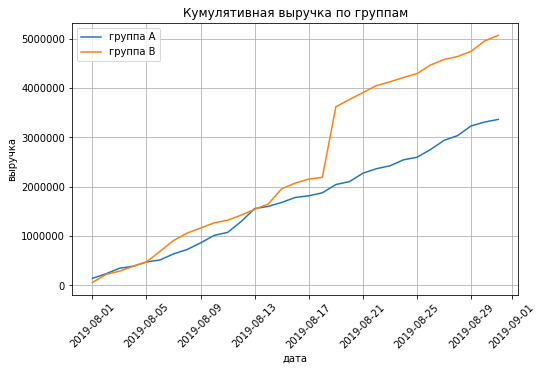

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
x = cumulativeRevenueA['date']

plt.figure(figsize = (8, 5))
plt.plot(x, cumulativeRevenueA['revenue'])
plt.plot(x, cumulativeRevenueB['revenue'])
plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата')
plt.xticks(rotation = 45)
plt.ylabel('выручка')
plt.grid(True, which = 'both') 
plt.legend(["группа А", "группа В"])
plt.show()

Выручка по группе А увеличивается почти равномерно в течение всего периода. Однако график выручки группы В резко вырастает в точке, соответствующей 18 августа. Это может быть связано либо со всплеском числа заказов, либо с появлением очень дорогих заказов в выборке. В остальные даты также наблюдается равномерный рост. 

Построим графики среднего чека по группам — отношение кумулятивной выручки к кумулятивному числу заказов:

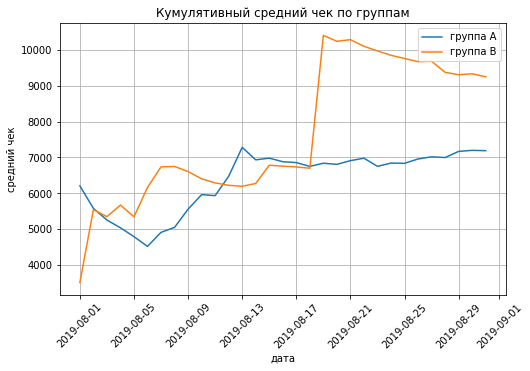

In [36]:
x = cumulativeRevenueA['date']
y1 = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']
y2 = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']

plt.figure(figsize = (8, 5))
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.xticks(rotation = 45)
plt.ylabel('средний чек')
plt.grid(True, which = 'both') 
plt.legend(["группа А", "группа В"])
plt.show()

Средний чек по группе А сильно колеблется в первой половине месяца, затем разброс значений снижается. Предположительно показатель установился на уровне около 7 000 у.е.

Средний чек по группе В также испытывает сильные колебания в первой половине периода. Затем происходит резкий подъем (крупные заказы 18 августа) и дальнейшее плавное снижение. Требуется больше времени, чтобы установиться на определенном уровне.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


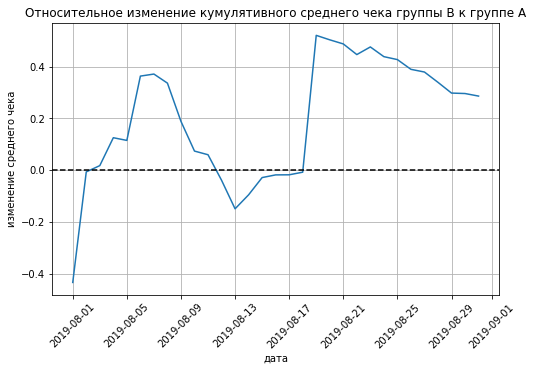

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA\
                        .merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
display(mergedCumulativeRevenue.head())

plt.figure(figsize = (8, 5))
plt.plot(mergedCumulativeRevenue['date'],\
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])\
    / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)

plt.axhline(y = 0, color = 'black', linestyle  = '--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.xticks(rotation = 45)
plt.ylabel('изменение среднего чека')
plt.grid(True, which='both') 
plt.show()

График резко скачет - показатель принимает значения от -40% до 47%. В первой декаде месяца средний чек по группам еще не успел установиться на одном уровне. Всплеск соответствует уже упомянутому выбросу 18 августа. После этой даты сильных колебаний уже нет, средние чеки по обеим группам начинают сближаться, однако нельзя говорить об их скором совпадении.

Проанализируем график кумулятивной конверсии:

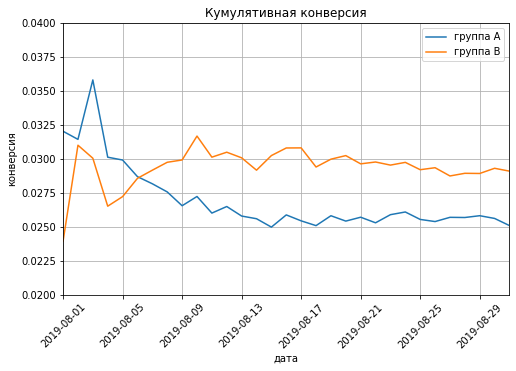

In [38]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize = (8, 5))
plt.plot(x, cumulativeDataA['conversion'])
plt.plot(x, cumulativeDataB['conversion'])

plt.title('Кумулятивная конверсия')
plt.xlabel('дата')
plt.xticks(rotation = 45)
plt.ylabel('конверсия')
plt.grid(True, which='both') 
plt.legend(["группа А", "группа В"])
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04]) 
plt.show()

Начиная с середины августа обе конверсии устанвились примерно на одном уровне - у группы А на 2,5%, а у группы В - на 2,9%, есть незначительные колебания.

Построим график относительного различия кумулятивных конверсий:

,date,conversionA,conversionB
0,2019-08-01,0.032033,0.023944
1,2019-08-02,0.031437,0.031008
2,2019-08-03,0.035811,0.030050
3,2019-08-04,0.030125,0.026521
4,2019-08-05,0.029918,0.027225


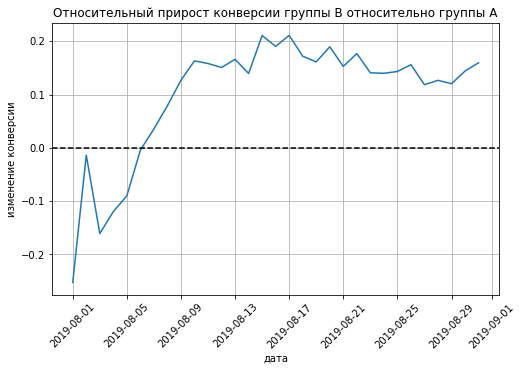

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']]\
    .merge(cumulativeDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

display(mergedCumulativeConversions.head())

plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
             / mergedCumulativeConversions['conversionA'] - 1)

plt.axhline(y = 0, color = 'black', linestyle  = '--') 
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('дата')
plt.xticks(rotation = 45)
plt.ylabel('изменение конверсии')
plt.grid(True, which='both') 
plt.show()


В первые 6 дней группа B уступала группе A по конверсии, однако затем резко вырвалась вперед. Пик был достигнут к середине месяца, затем отношение немного пошло на спад.

В целом, судя по графику, отношение конверсии окончательно ещё не зафиксировалось, но близко к этому (на предыдущем графике обе конверсии по отдельности практически установились, значит и их отношение должно быть примерно на одинаковом уровне).

### Анализ выбросов и всплесков <a name="wavelets_analysis"></a>

При предварительном анализе данных мы увидели, что в некоторых столбцах содержатся аномально высокие значения. Выбросы могут исказить результаты исследования. Во-первых, если очень дорогой заказ попадёт в одну из групп теста, результаты будут искажены в пользу группы, где он оказался. При этом такие покупки довольно редки и проявляются в результатах не из-за тестирования гипотезы, а случайно. Во-вторых, пользователи, совершившие много заказов, влияют на расчет конверсии, неоправданно увеличивая ее. Скорее всего, их поведение отличается от нормального. В связи с этим крайние значения следует отсеивать.

Посмотрим на распределение количества заказов по пользователям:

In [40]:
ordersByUsers = orders_new.drop(['group', 'revenue', 'date'], axis = 1)\
                    .groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers.sort_values(by = 'orders', ascending = False))

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Таким образом, есть пользователи, которые совершали более одного заказа. Посмотрим, можно ли отнести 2 или 3 заказа к аномалиям. Построим точечный график:

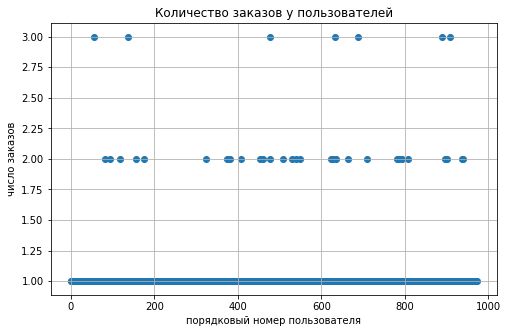

In [41]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(8, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов у пользователей')
plt.xlabel('порядковый номер пользователя')
plt.ylabel('число заказов')
plt.grid(True, which = 'both') 
plt.show()

Основная доля пользователей совершила 1 заказ, некоторые - по два. Для более точного определения границы посчитаем выборочные перцентили количества заказов на одного пользователя:

In [42]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([1., 2.])

Таким образом, 95% пользователей оформляли лишь 1 заказ, и 1% - более 2. За границу числа заказов выберем 2.

Теперь оценим выручку с заказов:

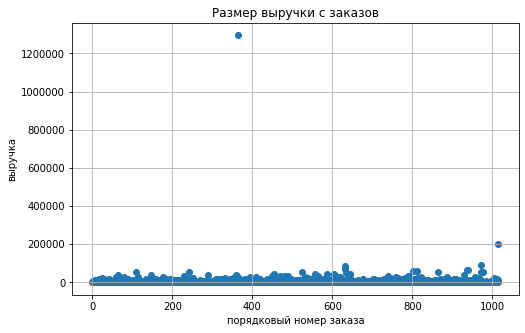

In [43]:
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.figure(figsize=(8, 5))
plt.scatter(x_values, orders_new['revenue']) 
plt.title('Размер выручки с заказов')
plt.xlabel('порядковый номер заказа')
plt.ylabel('выручка')
plt.grid(True, which = 'both') 
plt.show()

Основная часть заказов стоит менее 50 000 у.е., однако есть два дорогих, искажающих результаты. Для выбора границы определим 95-й и 99-й перцентили:

In [44]:
display(np.percentile(orders_new['revenue'], [95, 99])) 

array([26785., 53904.])

5% заказов стоят более 26 785 у.е., 1% - более 53 904 у.е. В качестве границы выручки выберем 54 000 у.е.

### Статистическая значимость различий между группами <a name="stat_sign"></a>

Поскольку работаем с достаточно большими выборками, в качестве уровня значимости для статистических тестов выберем **alpha = 0,05**.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных значений. 

Зададим датафреймы, в которых для каждого пользователя из той или иной группы будет указано общее количество его заказов: 

In [45]:
ordersByUsersA = orders_new[orders_new['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_new[orders_new['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders'] 

print('В группе А:')
print('Покупателей -', len(ordersByUsersA))
print('Покупок -', ordersByUsersA['orders'].sum())
print('Посетителей -', visitors_new[visitors_new['group'] == 'A']['visitors'].sum())
print()
print('В группе B:')
print('Покупателей -', len(ordersByUsersB))
print('Покупок -', ordersByUsersB['orders'].sum())
print('Посетителей -', visitors_new[visitors_new['group'] == 'B']['visitors'].sum())

В группе А:
Покупателей - 445
Покупок - 468
Посетителей - 18650

В группе B:
Покупателей - 528
Покупок - 548
Посетителей - 18832


Составим списки заказов по всем пользователям, в т.ч. и по тем, кто не купил ничего, объединив массивы из пользователей с заказами и нужным числом нулей. К полученным выборкам можно будет применить статистический критерий.

In [46]:
list1 = np.arange(visitors_new[visitors_new['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders']))
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = list1, name = 'orders')], axis = 0)

list2 = np.arange(visitors_new[visitors_new['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders']))
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = list2, name = 'orders')], axis = 0)

print(sampleA.sum())
print(sampleA.size)
print(sampleB.sum())
print(sampleB.size)

468
18650
548
18832


Применим критерий Манна-Уитни (непараметрический, т.к. работаем с выборкой, в которй встречаются аномальные значения). Мы проверяем следующие гипотезы:
- H0: конверсии пользователей группы А и группы В (по неочищенным данным) одинаковы.
- H1: конверсии пользователей группы А и группы В (по неочищенным данным) отличаются.

In [47]:
print("p-value:", stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1].round(5))

p-value: 0.01109


Получившееся p-value меньше, чем выбранный уровень статистической значимости, т.е. вероятность ошибиться, отвергая Н0, мала. Таким образом, у нас есть основание отвергнуть гипотезу о равенстве конверсий.

In [48]:
(sampleB.mean()/sampleA.mean() - 1).round(3)

0.16

*Относительный прирост конверсии группы B (по неочищенным данным) составляет 16%, и он статистически значим.*

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Мы проверяем следующие гипотезы:
- H0: средний чек пользователей группы А и группы В (по неочищенным данным) одинаков.
- H1: средний чек пользователей группы А и группы В (по неочищенным данным) отличается.

In [49]:
print("p-value:", stats.mannwhitneyu(orders_new[orders_new['group'] == 'A']['revenue'],\
                                        orders_new[orders_new['group'] == 'B']['revenue'], True, 'two-sided')[1].round(3))
print("Относительный прирост среднего чека по группе В:",\
(orders_new[orders_new['group'] == 'B']['revenue'].mean()/orders_new[orders_new['group'] == 'A']['revenue'].mean() - 1).round(3)) 

p-value: 0.829
Относительный прирост среднего чека по группе В: 0.287


Получившееся p-value существенно превышает выбранный уровень статистической значимости, поэтому у нас нет оснований отвергнуть гипотезу о равенстве среднего чека в обеих группах. *Таким образом, относительный прирост среднего чека группы B (по неочищенным данным) составляет 28,7%, однако результат статистически не значим.*

---

Теперь проделаем аналогичные расчеты, предварительно очистив датафреймы от аномальных значений. Ранее мы определили, что к аномальному числу заказов можно отнести все превышающие 2, а к аномальной сумме покупке - превосходящую 54 000 у.е. Уберем из таблиц значения, лежащие за указанными пределами.

Зададим новую таблицу, в которой будут только пользователи с аномальным числом заказов или суммой зааказа:

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders_new[orders_new['revenue'] > 54000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Количество пользователей с аномальными значениями -', len(abnormalUsers)) 

Количество пользователей с аномальными значениями - 16


Очищенные выборки:

In [51]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
    pd.Series(0, index = list1, name = 'orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
    pd.Series(0, index = list2, name = 'orders')], axis=0) 

print(sampleAFiltered.sum())
print(sampleAFiltered.size)
print(sampleBFiltered.sum())
print(sampleBFiltered.size)

448
18640
538
18826


Применим критерий Манна-Уитни для проверки гипотез относительно изменеия конверсии:
- H0: конверсии пользователей группы А и группы В (по очищенным данным) одинаковы.
- H1: конверсии пользователей группы А и группы В (по очищенным данным) отличаются.

In [52]:
print("p-value:", stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1].round(5))

p-value: 0.00707


Получившееся p-value меньше, чем выбранный уровень статистической значимости, т.е. вероятность ошибиться, отвергая Н0, очень мала. Таким образом, у нас есть основание отвергнуть гипотезу о равенстве конверсий.

In [53]:
(sampleBFiltered.mean()/sampleAFiltered.mean() - 1).round(3)

0.189

*Относительный прирост конверсии группы B (по неочищенным данным) составляет 18,9%, и он статистически значим.*

Наконец, посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным. Мы проверяем следующие гипотезы:
- H0: средний чек пользователей группы А и группы В (по очищенным данным) одинаков.
- H1: средний чек пользователей группы А и группы В (по очищенным данным) отличается.

In [54]:
print("p-value:", stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'], True, 'two-sided')[1].round(3))
print("Относительный прирост среднего чека по группе В:",\
    (orders_new[np.logical_and(
        orders_new['group']=='B', np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
     orders_new[np.logical_and(
        orders_new['group']=='A',np.logical_not(orders_new['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1).round(3)) 

p-value: 0.788
Относительный прирост среднего чека по группе В: -0.032


Получившееся p-value превышает выбранный уровень статистической значимости, поэтому нет оснований отвергнуть гипотезу о равенстве среднего чека в обеих группах. *Таким образом, относительный прирост среднего чека группы B (по очищенным данным) составляет -3,2%, однако результат статистически не значим.*

---

### Вывод <a name="conclusion_pt2"></a>

В ходе предварительного анализа данных было выявлено, что часть пользователей была отнесена одновременно и к группе А, и к группе В. Соответствующие записи были удалены из датасетов, чтобы не искажать результаты.

Итоги А/В-теста следующие:
- и на "сырых", и на очищенных данных конверсия группы В выше (на 16% и 18,9% соответственно). Этот результат можно считать статистически значимым. 
- несмотря на существенную разницу в средних чеках, говорить о статистически значимых различиях нельзя.

В целом можно признать тест состоявшимся и завершить его. Конверсии по обеим группам зафиксировались, причем конверсия группы В существенно выше относительно группы А. При этом средний чек по группам не отличается.